In [13]:
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x = loadmat('../Data/M1-DeepSquat.mat')
correct = x['Train_Data']
T1 = correct.shape[1]
incorrect = x['Test_Data']
T2 = incorrect.shape[1]

In [15]:
Train_Data = []
Test_Data = []
for i in range(T1):
    Train_Data.append(correct[0,i])
for i in range(T2):
    Test_Data.append(incorrect[0,i])
Train_Data = np.dstack(Train_Data)
Train_Data = np.rollaxis(Train_Data,-1)
Test_Data = np.dstack(Test_Data)
Test_Data = np.rollaxis(Test_Data,-1)

Train_Data_org = Train_Data
Test_Data_org = Test_Data

In [16]:
samples = Train_Data.shape[0]
timesteps = Train_Data.shape[1]
features = Train_Data.shape[2]
Train_Data = np.reshape(Train_Data,(samples*timesteps,features))
Test_Data = np.reshape(Test_Data,(samples*timesteps,features))

In [17]:
Train_Data = StandardScaler().fit_transform(Train_Data)
print(Train_Data.shape)
i = 1

(21600, 117)


(21600, 4)
(21600, 4)
(21600, 4)
(21600, 4)
(21600, 4)
(21600, 4)


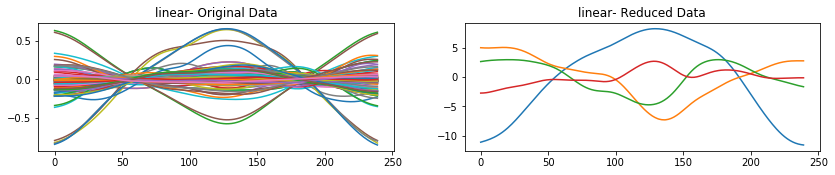

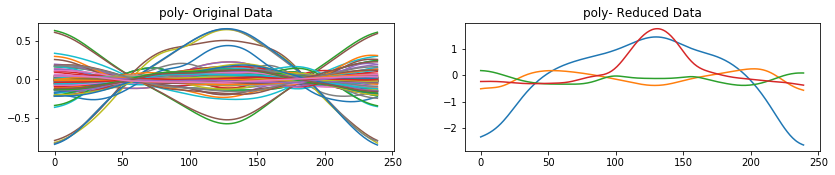

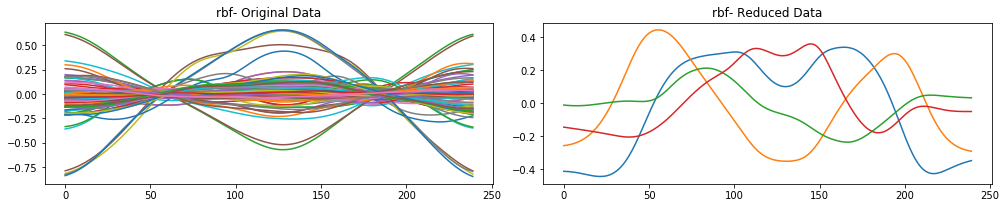

In [18]:
#Construct KPCA
for x in ['linear', 'poly', 'rbf'] : 
    
    components = 4
    transformer = KernelPCA(n_components=components, kernel=x)
    transformer.fit(Train_Data)
    Train_Data_Reduced = transformer.transform(Train_Data)
    Test_Data_Reduced = transformer.transform(Test_Data)
    
    print(Train_Data_Reduced.shape)
    print(Test_Data_Reduced.shape)
    
    Train_Data_Reduced = np.reshape(Train_Data_Reduced,(samples,timesteps,components))
    Test_Data_Reduced = np.reshape(Test_Data_Reduced,(samples,timesteps,components))
    
    csv_correct = Train_Data_Reduced.reshape(samples,timesteps*components)
    np.savetxt('../Data/'+ x + '_reduced_correct.csv', csv_correct ,delimiter=',')
    csv_incorrect = Test_Data_Reduced.reshape(samples,timesteps*components)
    np.savetxt('../Data/'+ x + '_reduced_incorrect.csv', csv_incorrect ,delimiter=',') 
    
    #Plot original and reduced data
    plt.figure(figsize = (14,8))
    # display original sequences
    plt.subplot(3,2,i)
    plt.plot(Train_Data_org[0])
    plt.title(x + '- Original Data')
    # display reduced sequence
    plt.subplot(3,2,i+1)
    plt.plot(Train_Data_Reduced[0])
    plt.title(x + '- Reduced Data')
    i = i+2
    
plt.tight_layout()
plt.show()
